In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
data = pd.read_csv('Sunspots.csv', parse_dates=True).drop(columns='Unnamed: 0')
data.head()
data.index = pd.DatetimeIndex(data['Date'])
data.drop(columns='Date',inplace=True)
data.columns=['Monthly_Mean_Sunspots']

3265

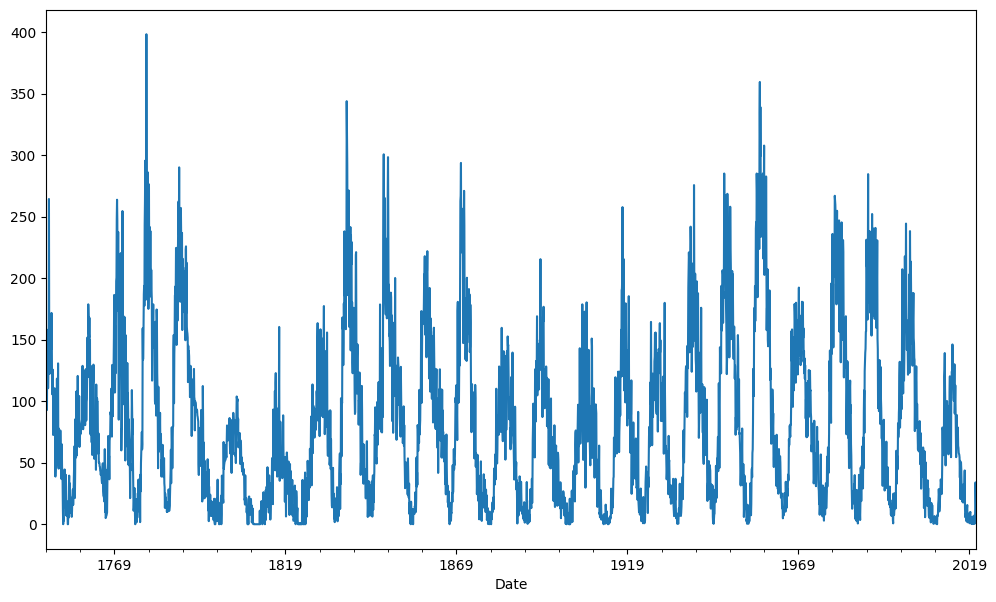

In [340]:
data['Monthly_Mean_Sunspots'].plot(figsize=(12, 7))
data

In [243]:
data_yearly_mean = data['Monthly_Mean_Sunspots'].resample('A').mean().dropna()

In [244]:
data_yearly_mean

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.583333
2020-12-31      8.625000
2021-12-31     10.400000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 273, dtype: float64

<Axes: xlabel='Date'>

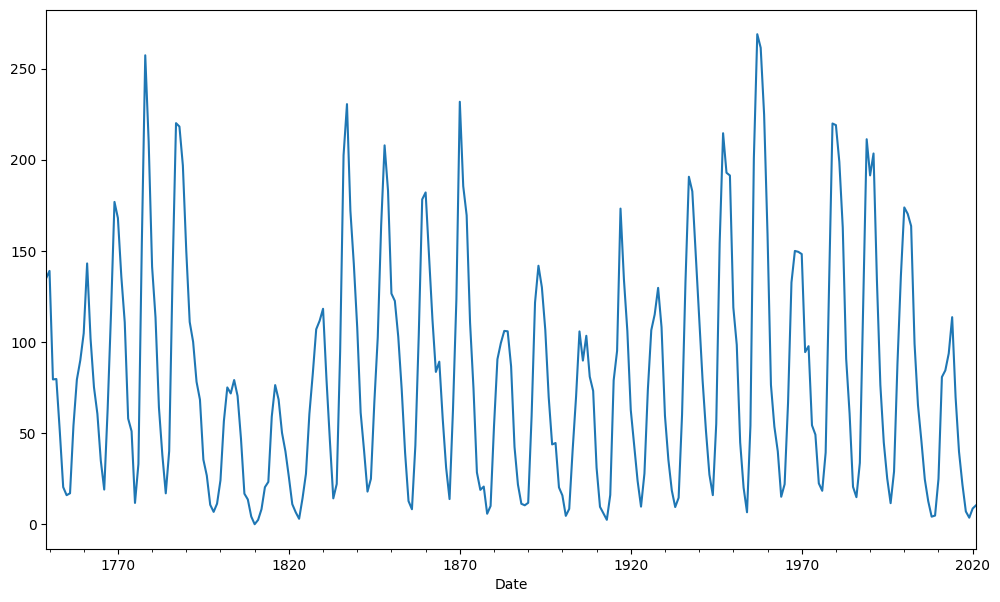

In [245]:
data_yearly_mean.plot(figsize=(12, 7))

In [246]:
data_yearly_mean

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.583333
2020-12-31      8.625000
2021-12-31     10.400000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 273, dtype: float64

In [247]:
data_yearly_mean['1749-12-31']

134.875

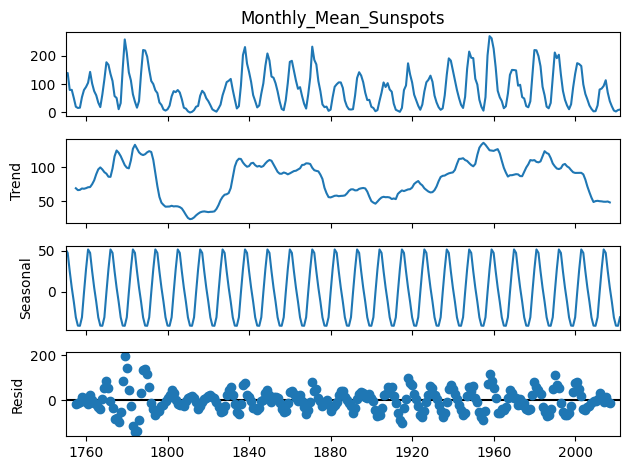

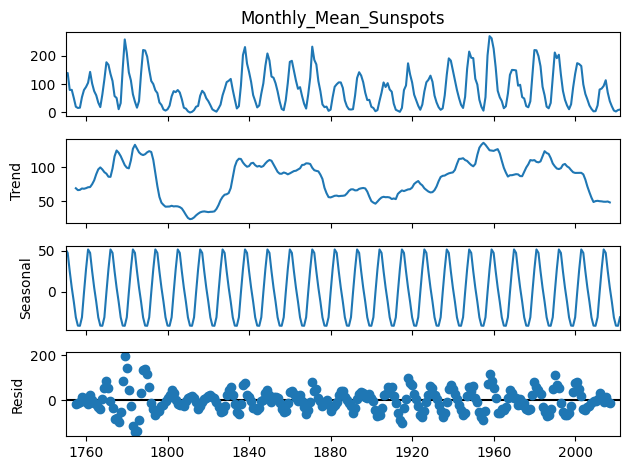

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data_yearly_mean, period=11).plot()

<Axes: xlabel='Date'>

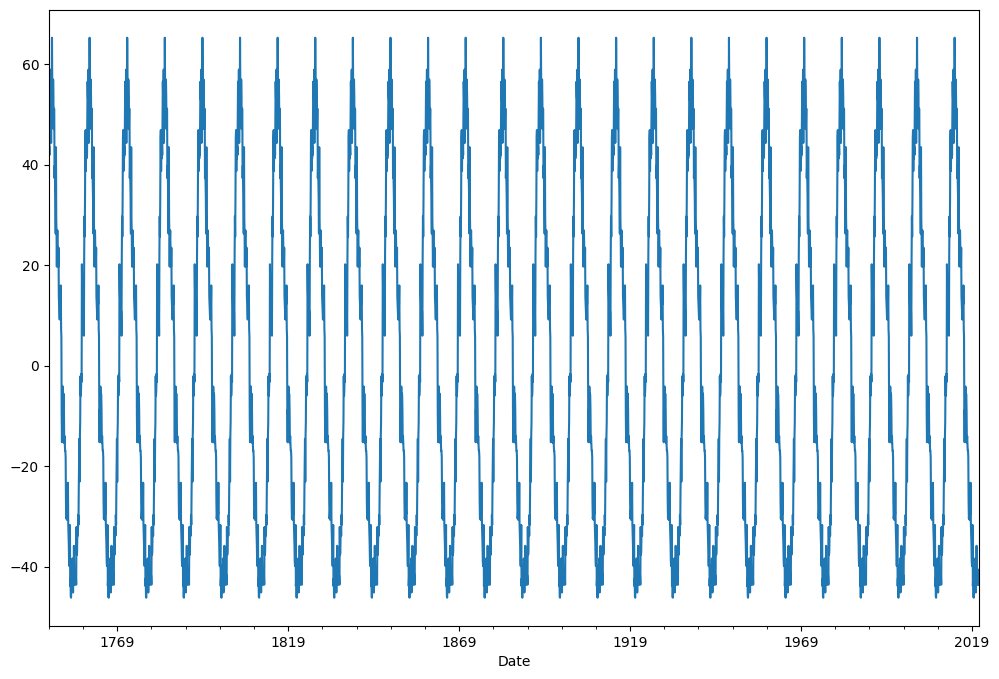

In [249]:
seasonal_decompose(data['Monthly_Mean_Sunspots'], period=132).seasonal.plot(figsize=(12, 8))

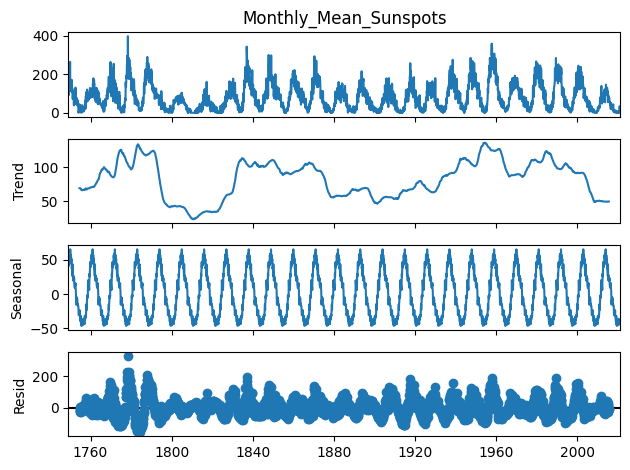

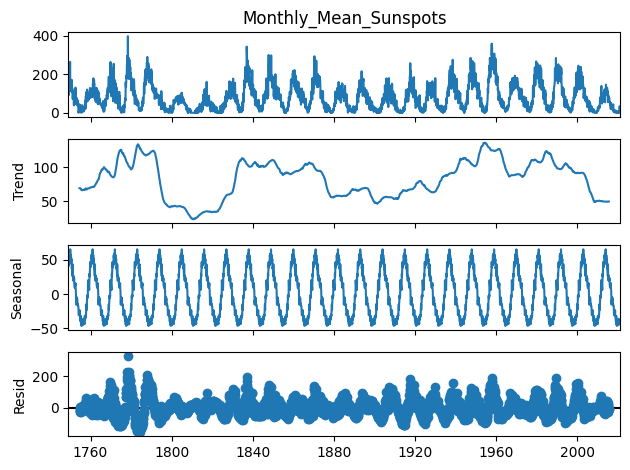

In [250]:
seasonal_decompose(data['Monthly_Mean_Sunspots'], period=132).plot()

In [251]:
from statsmodels.tsa.stattools import adfuller
adfuller(data['Monthly_Mean_Sunspots'])

(-10.497051662546145,
 1.1085524921956106e-18,
 28,
 3236,
 {'1%': -3.4323724026124003,
  '5%': -2.8624335760905684,
  '10%': -2.5672456699774324},
 29834.491003687108)

In [252]:
data_yearly_mean

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.583333
2020-12-31      8.625000
2021-12-31     10.400000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 273, dtype: float64

In [253]:
data_yearly_sum = data['Monthly_Mean_Sunspots'].resample('A').sum().dropna()
data_yearly_sum

Date
1749-12-31    1618.5
1750-12-31    1668.0
1751-12-31     953.3
1752-12-31     956.0
1753-12-31     613.5
               ...  
2017-12-31     261.8
2018-12-31      84.1
2019-12-31      43.0
2020-12-31     103.5
2021-12-31      10.4
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 273, dtype: float64

<Axes: xlabel='Date'>

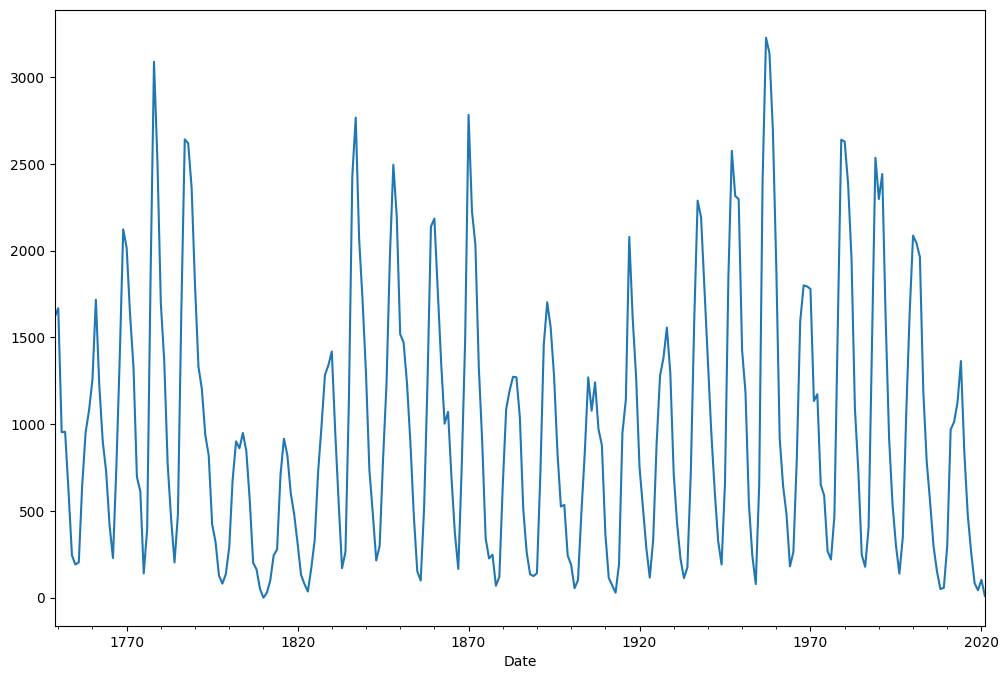

In [254]:
data_yearly_sum.plot(figsize=(12, 8))

In [255]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [256]:
model = SimpleExpSmoothing(data_yearly_mean).fit()

In [257]:
model.summary()

Dep. Variable:,Monthly_Mean_Sunspots,No. Observations:,273
Model:,SimpleExpSmoothing,SSE,402118.233
Optimized:,True,AIC,1995.543
Trend:,None,BIC,2002.762
Seasonal:,None,AICC,1995.692
Seasonal Periods:,None,Date:,"Wed, 01 Nov 2023"
Box-Cox:,False,Time:,02:23:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,134.87500,l.0,False


<Axes: xlabel='Date'>

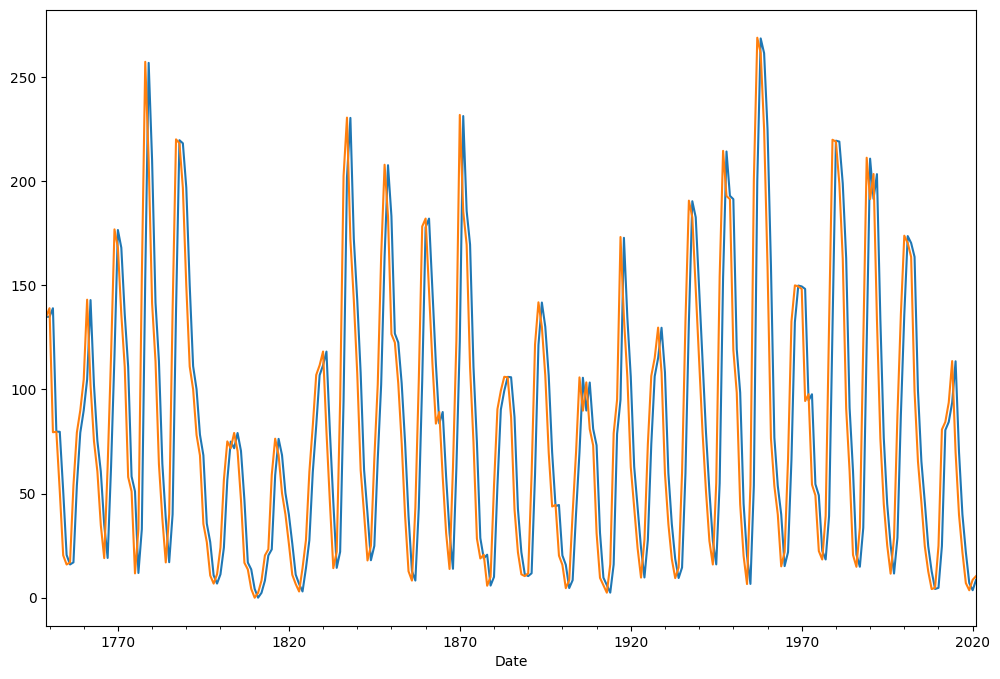

In [258]:
model.predict(0).plot(figsize=(12, 8))
data_yearly_mean.plot(figsize=(12, 8))

In [259]:
data_yearly_mean_shift = data_yearly_mean.shift(11)

<Axes: xlabel='Date'>

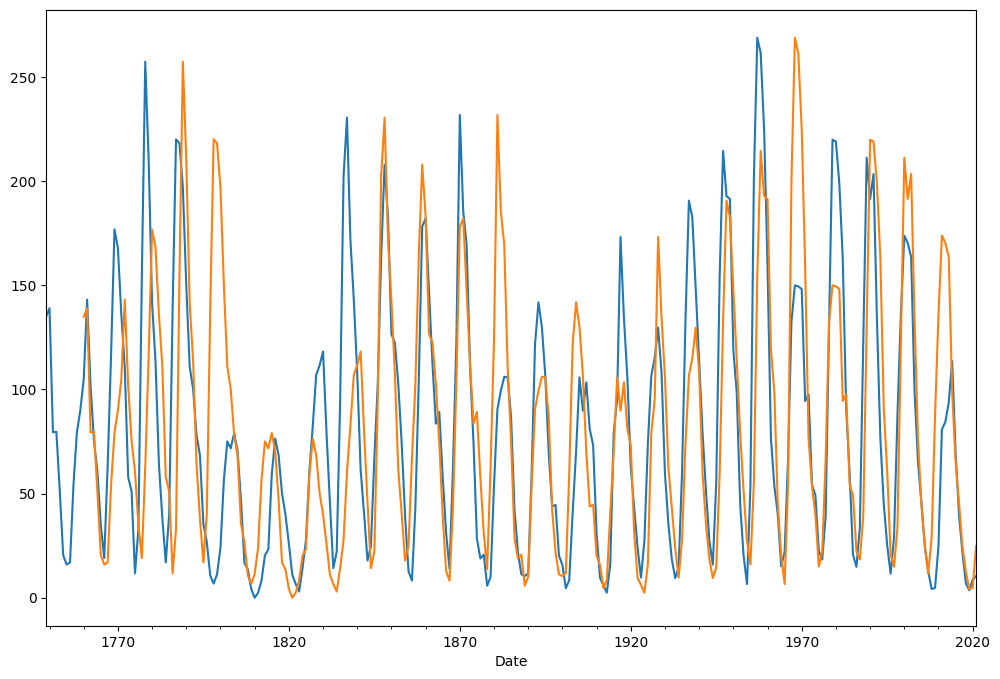

In [260]:
data_yearly_mean.plot(figsize=(12, 8))
data_yearly_mean_shift.plot(figsize=(12, 8))

In [261]:
len(data_yearly_mean_shift.dropna())

262

In [262]:
len(data_yearly_mean)

273

In [263]:
data_yearly_mean_shift.dropna()

Date
1760-12-31    134.875000
1761-12-31    139.000000
1762-12-31     79.441667
1763-12-31     79.666667
1764-12-31     51.125000
                 ...    
2017-12-31     24.625000
2018-12-31     12.633333
2019-12-31      4.150000
2020-12-31      4.750000
2021-12-31     24.900000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 262, dtype: float64

In [264]:
data_yearly_mean['1760-12-31':]

Date
1760-12-31    104.775000
1761-12-31    143.083333
1762-12-31    101.916667
1763-12-31     75.200000
1764-12-31     60.575000
                 ...    
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.583333
2020-12-31      8.625000
2021-12-31     10.400000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 262, dtype: float64

In [265]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(data_yearly_mean['1760-12-31':], data_yearly_mean_shift.dropna()))

54.132026690428205

<Axes: xlabel='Date'>

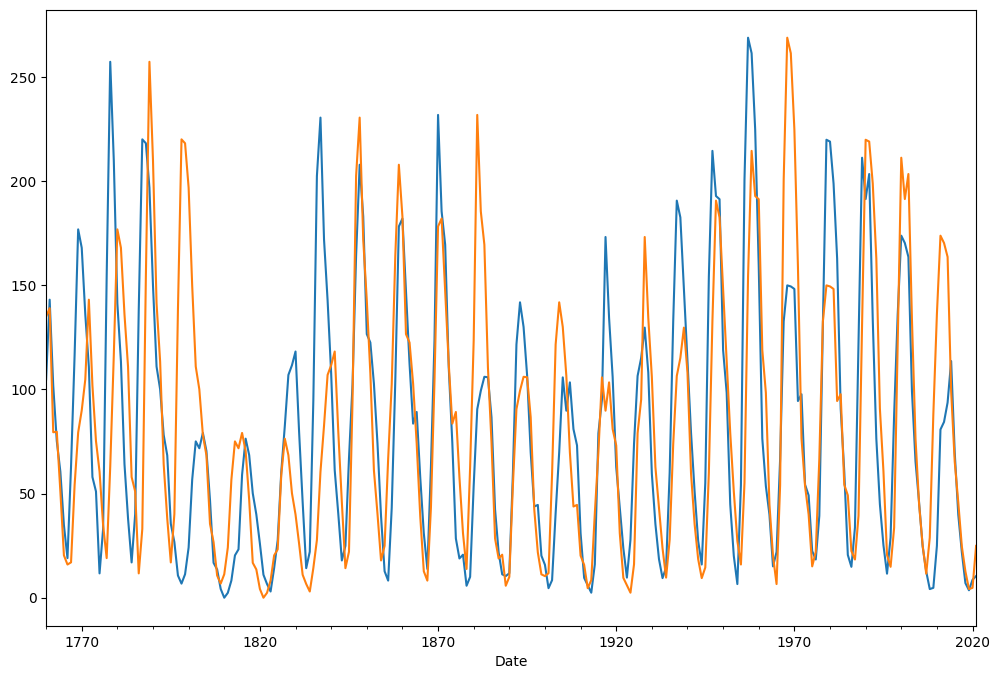

In [266]:
data_yearly_mean['1760-12-31':].plot(figsize=(12, 8))
data_yearly_mean_shift.dropna().plot(figsize=(12, 8))

In [267]:
diff = data_yearly_mean_shift.dropna()-data_yearly_mean['1760-12-31':]

<Axes: xlabel='Date'>

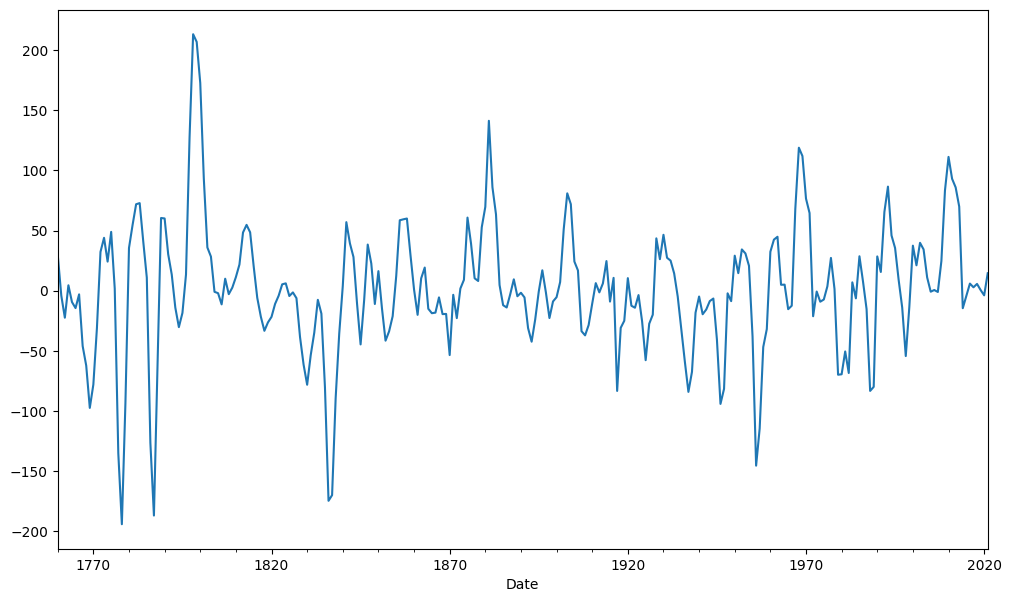

In [268]:
diff.plot(figsize=(12, 7))

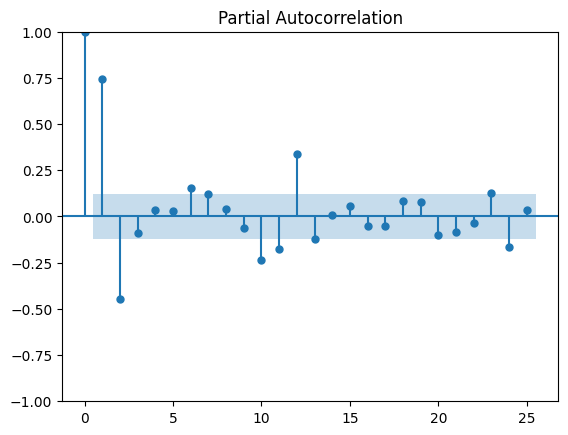

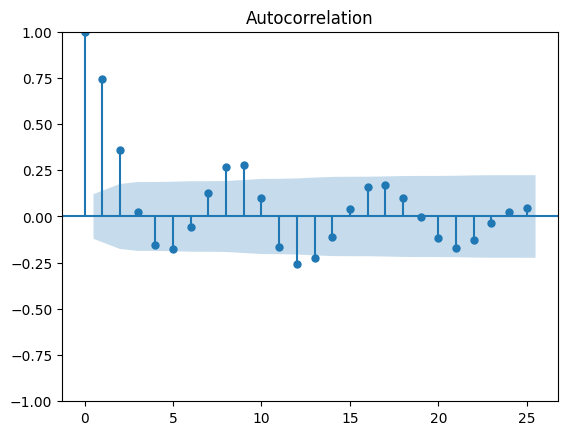

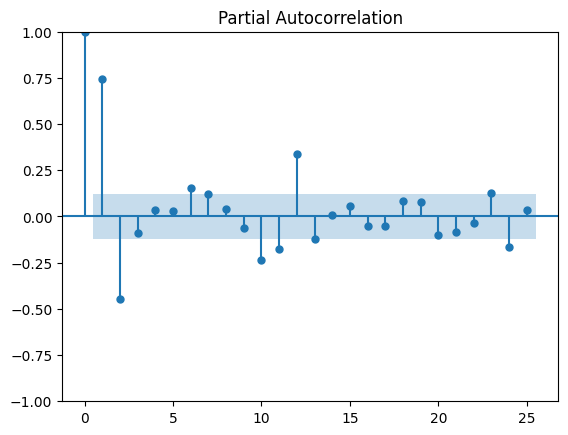

In [269]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff)
plot_pacf(diff)

In [270]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff, order=(3, 0, 3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Monthly_Mean_Sunspots   No. Observations:                  262
Model:                    ARIMA(3, 0, 3)   Log Likelihood               -1272.439
Date:                   Wed, 01 Nov 2023   AIC                           2560.878
Time:                           02:23:57   BIC                           2589.425
Sample:                       12-31-1760   HQIC                          2572.352
                            - 12-31-2021                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9097      6.796      0.134      0.894     -12.410      14.229
ar.L1          1.9876      0.118     16.787      0.000       1.756       2.220
ar.L2         -1.7686      0.164    -10.755      0.000      -2.091      -1.446
ar.L3          0.5603      0.096      5.811      0.000       0.371       0.749
ma.L1         -1.0040      0.130     -7.716      0.000      -1.259      -0.749
ma.L2          0.5058      0.103      4.930      0.000       0.305       0.707
ma.L3          0.1914      0.087      2.210      0.027       0.022       0.361
sigma2       961.3971     77.650     12.381      0.000     809.205    1113.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.43
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [271]:
model.predict()

Date
1760-12-31     0.909652
1761-12-31    22.712218
1762-12-31   -17.203012
1763-12-31   -24.550700
1764-12-31    12.416035
                ...    
2017-12-31    17.200791
2018-12-31    13.910647
2019-12-31    10.970877
2020-12-31    -3.547313
2021-12-31   -11.871126
Freq: A-DEC, Name: predicted_mean, Length: 262, dtype: float64

In [272]:
mean_squared_error(diff, model.predict())

965.4377192564465

In [273]:
forecasts_arima2 = model.predict(start='2022-12-31', end='2080-12-31')

<Axes: xlabel='Date'>

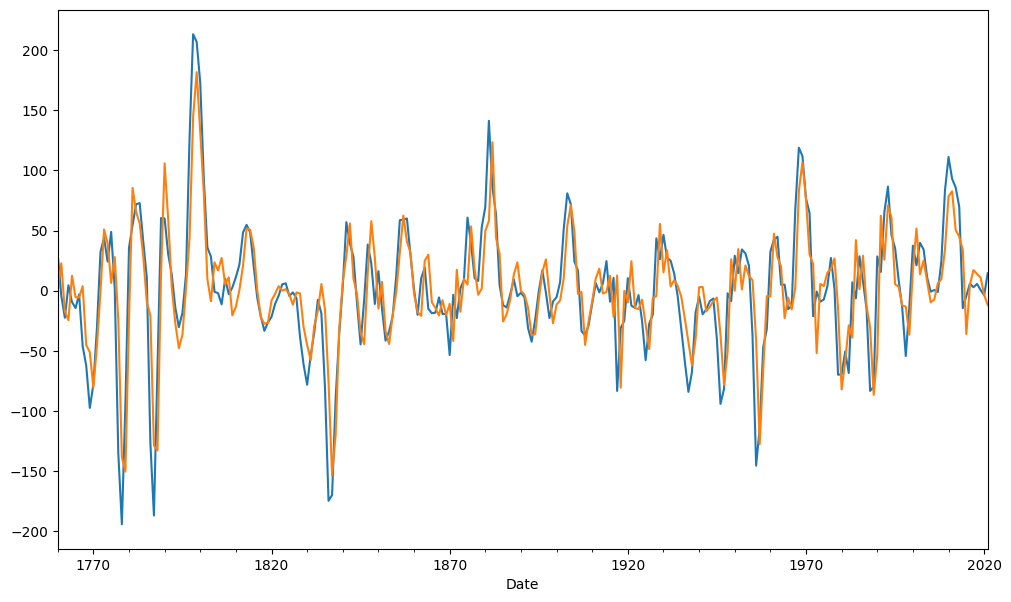

In [274]:
diff.plot(figsize=(12, 7))
model.predict().plot(figsize=(12, 7))

<Axes: xlabel='Date'>

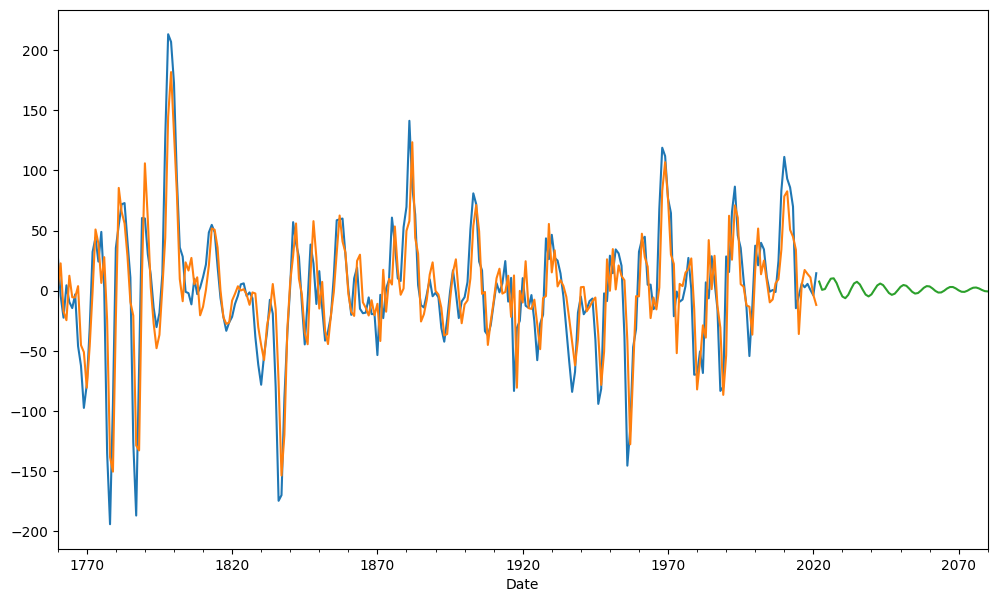

In [275]:
diff.plot(figsize=(12, 7))
model.predict().plot(figsize=(12, 7))
forecasts_arima2.plot(figsize=(12, 7))

In [276]:
rolling_data = data_yearly_mean.rolling(11).mean()

<Axes: xlabel='Date'>

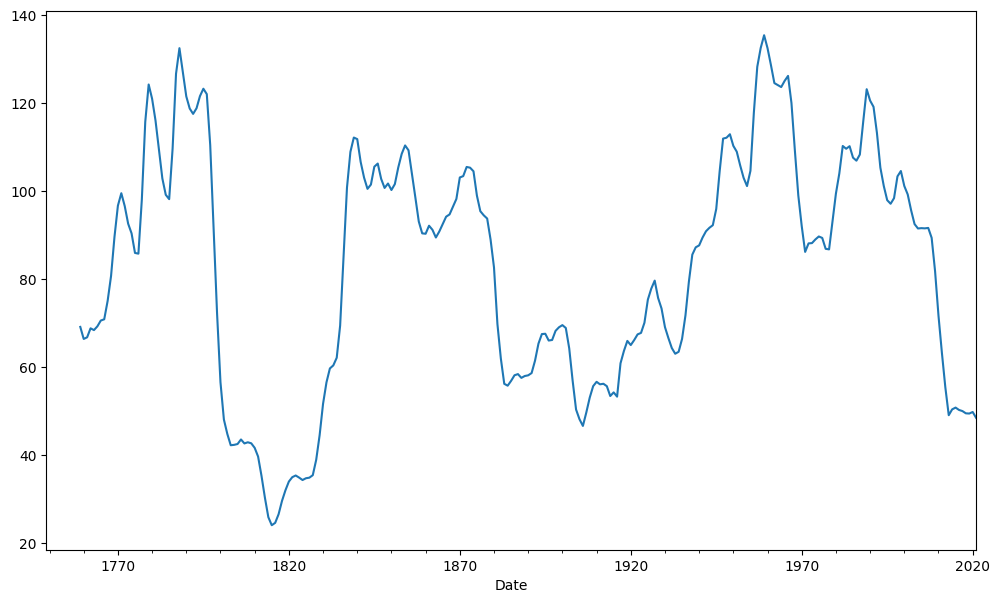

In [277]:
rolling_data.plot(figsize=(12, 7))

<Axes: xlabel='Date'>

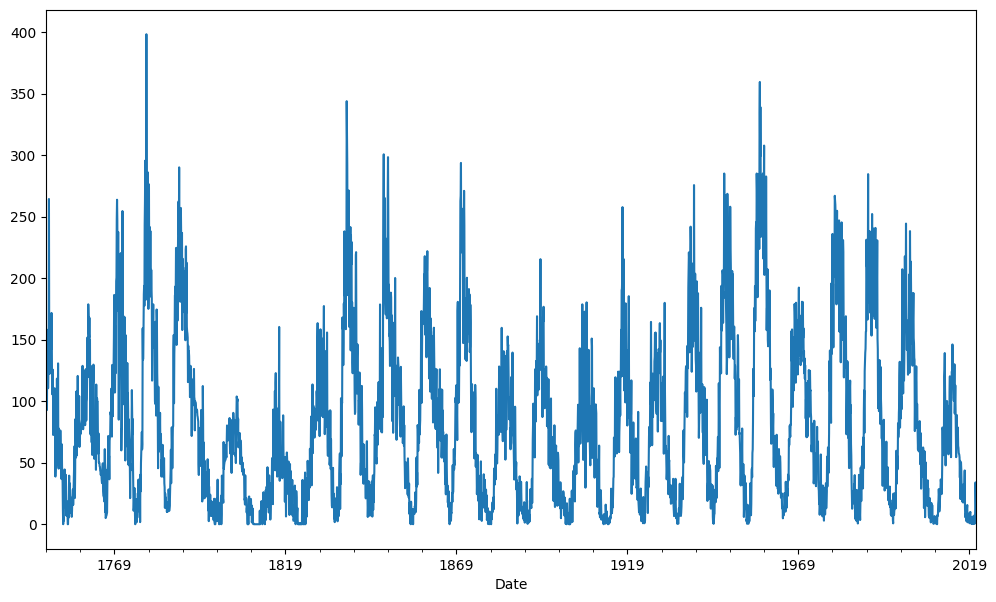

In [278]:
data['Monthly_Mean_Sunspots'].plot(figsize=(12, 7))

In [279]:
data_monthly_shifted = data['Monthly_Mean_Sunspots'].shift(132)
data_monthly_shifted.head(133) #1760-01-31


Date
1749-01-31     NaN
1749-02-28     NaN
1749-03-31     NaN
1749-04-30     NaN
1749-05-31     NaN
              ... 
1759-09-30     NaN
1759-10-31     NaN
1759-11-30     NaN
1759-12-31     NaN
1760-01-31    96.7
Name: Monthly_Mean_Sunspots, Length: 133, dtype: float64

<Axes: xlabel='Date'>

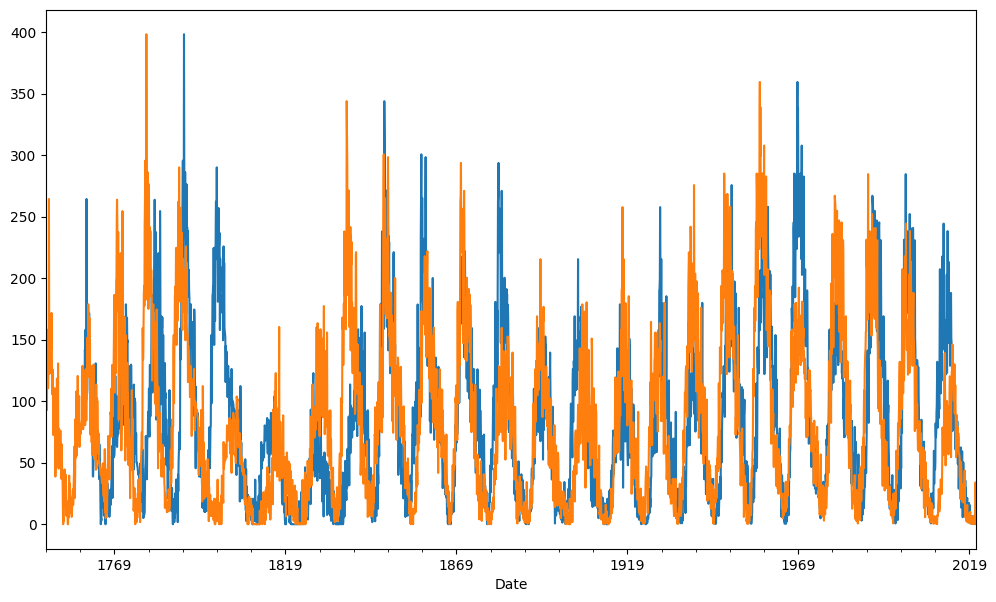

In [280]:
data_monthly_shifted.dropna().plot(figsize=(12, 7))
data['Monthly_Mean_Sunspots'].plot(figsize=(12, 7))

In [281]:
mean_squared_error(data_monthly_shifted.dropna(), data['Monthly_Mean_Sunspots'].loc['1760-01-31':])

4062.8455186722

In [282]:
model=SimpleExpSmoothing(data['Monthly_Mean_Sunspots']).fit()
model.predict(0)

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1749-01-31     96.700000
1749-02-28     96.700000
1749-03-31    100.655192
1749-04-30    109.005231
1749-05-31    100.571705
                 ...    
2020-09-30      6.317451
2020-10-31      3.341975
2020-11-30      9.096793
2020-12-31     22.056920
2021-01-31     21.923214
Freq: M, Length: 3265, dtype: float64

<Axes: xlabel='Date'>

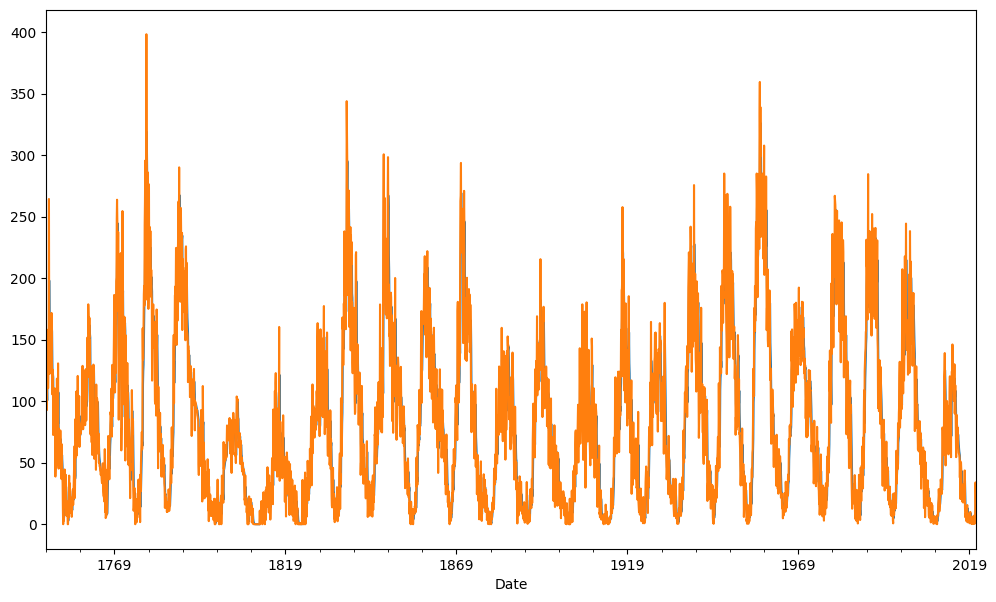

In [283]:
model.predict(0).plot(figsize=(12, 7))
data['Monthly_Mean_Sunspots'].plot()

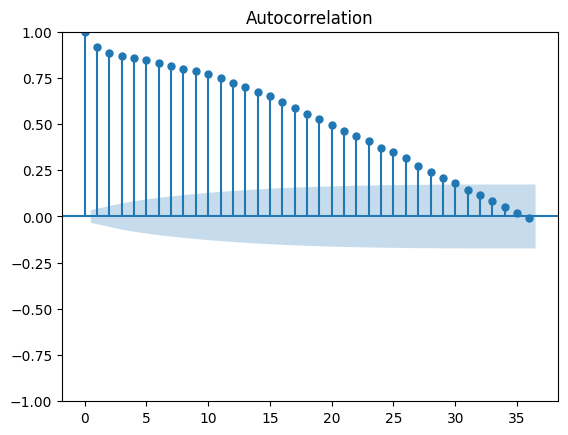

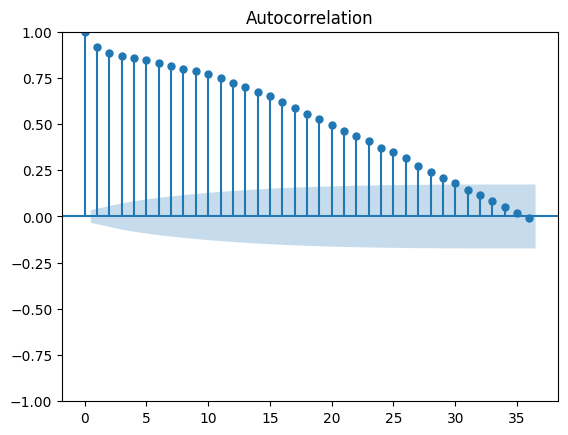

In [284]:
plot_acf(data['Monthly_Mean_Sunspots'])

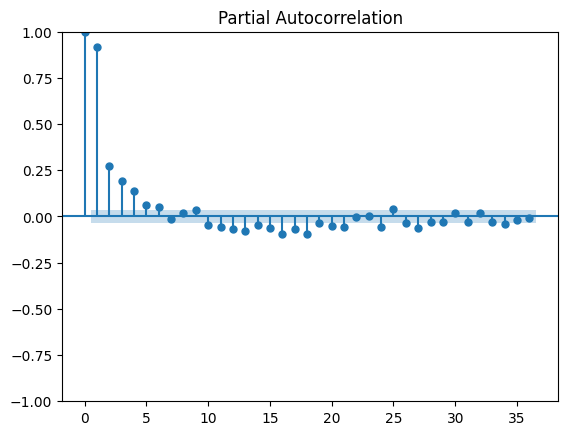

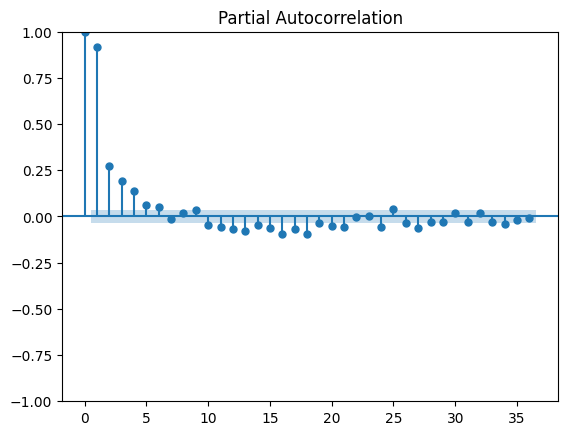

In [285]:
plot_pacf(data['Monthly_Mean_Sunspots'])

In [334]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
s = SARIMAX(data_yearly_mean, order=(3, 1, 3), seasonal_order=(3, 1, 3, 11)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Monthly_Mean_Sunspots   No. Observations:                  273
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 11)   Log Likelihood               -1222.360
Date:                            Wed, 01 Nov 2023   AIC                           2470.720
Time:                                    02:30:30   BIC                           2517.059
Sample:                                12-31-1749   HQIC                          2489.347
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6222      0.788      0.789      0.430      -0.922       2.167
ar.L2          0.5254      1.195      0.440      0.660      -1.817       2.867
ar.L3         -0.7960      0.676     -1.177      0.239      -2.122       0.530
ma.L1         -0.4947      0.781     -0.633      0.527      -2.025       1.036
ma.L2         -0.7649      1.069     -0.715      0.474      -2.860       1.331
ma.L3          0.4902      0.387      1.267      0.205      -0.268       1.249
ar.S.L11      -1.2744      0.495     -2.572      0.010      -2.246      -0.303
ar.S.L22      -0.6808      0.505     -1.348      0.178      -1.671       0.309
ar.S.L33       0.1050      0.105      1.003      0.316      -0.100       0.310
ma.S.L11       0.3567      3.535      0.101      0.920      -6.572       7.286
ma.S.L22      -0.5175      4.768     -0.109      0.914      -9.863       8.828
ma.S.L33      -0.8339      2.836     -0.294      0.769      -6.392       4.724
sigma2       599.9883   2056.678      0.292      0.770   -3431.027    4631.003
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                30.75
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.54
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

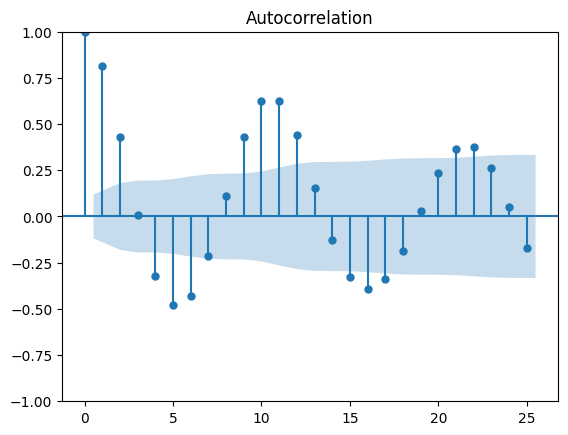

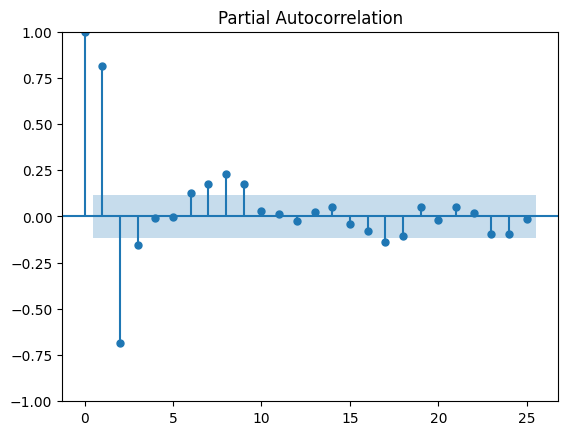

In [335]:
plot_acf(data_yearly_mean)
plot_pacf(data_yearly_mean)
s.summary()

In [336]:
s.predict()[1:]

Date
1750-12-31    134.904019
1751-12-31    138.995165
1752-12-31     79.383482
1753-12-31     79.628796
1754-12-31     51.108023
                 ...    
2017-12-31     18.925428
2018-12-31      3.738803
2019-12-31     -0.226315
2020-12-31      8.568608
2021-12-31     21.477161
Freq: A-DEC, Name: predicted_mean, Length: 272, dtype: float64

In [337]:
data_yearly_mean[1:]

Date
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
1754-12-31     20.358333
                 ...    
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.583333
2020-12-31      8.625000
2021-12-31     10.400000
Freq: A-DEC, Name: Monthly_Mean_Sunspots, Length: 272, dtype: float64

In [338]:
mean_squared_error(data_yearly_mean[1:], s.predict()[1:])

710.5946613403785

<Axes: xlabel='Date'>

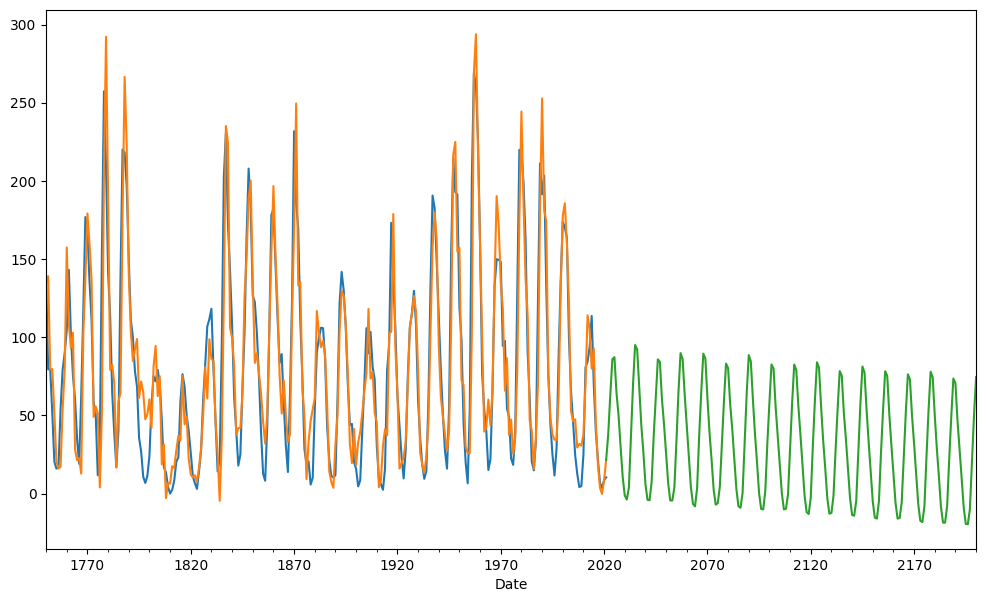

In [341]:
data_yearly_mean[1:].plot(figsize=(12, 7))
s.predict()[1:].plot()
s.predict(start='2021-12-31', end='2200-12-31').plot()

In [348]:
residuals = data_yearly_mean[1:]-s.predict()[1:]

DatetimeIndex(['1749-12-31', '1750-12-31', '1751-12-31', '1752-12-31',
               '1753-12-31', '1754-12-31', '1755-12-31', '1756-12-31',
               '1757-12-31', '1758-12-31',
               ...
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=273, freq='A-DEC')

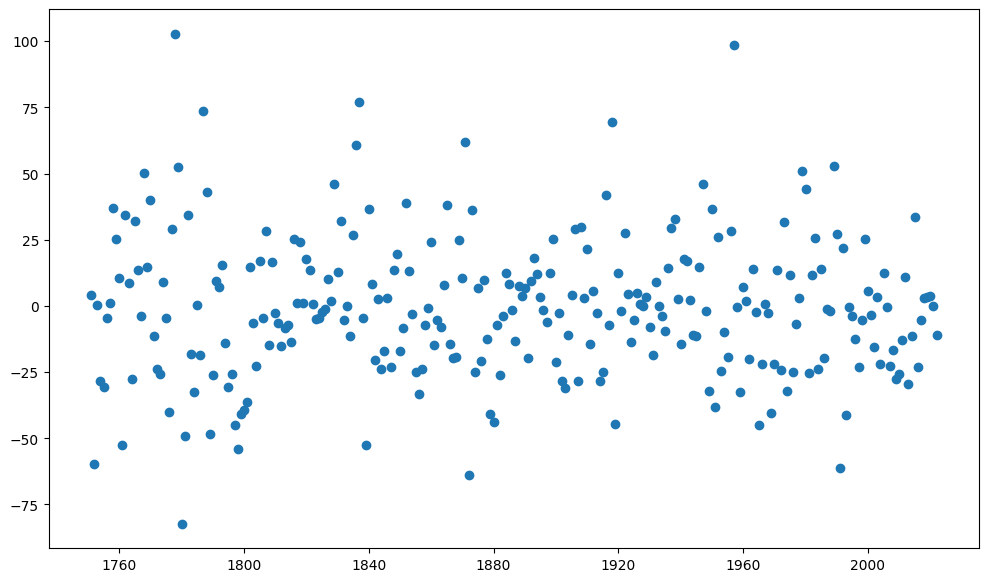

In [352]:
from matplotlib.pyplot import figure, scatter
figure(figsize=(12, 7))
scatter(s.predict().index[1:], residuals)

In [371]:
def bootstrap_residuals(residuals, window_size):

  bootstrapped_residuals = np.empty_like(residuals)
  for i in range(len(residuals)):
    # Select a random window of residuals.
    window = np.random.choice(residuals, window_size)

    # Replace the residual at the current index with the bootstrapped residual.
    bootstrapped_residuals[i] = window.mean()

  return bootstrapped_residuals


In [372]:
bootstrapped_residuals = bootstrap_residuals(residuals, window_size=100)

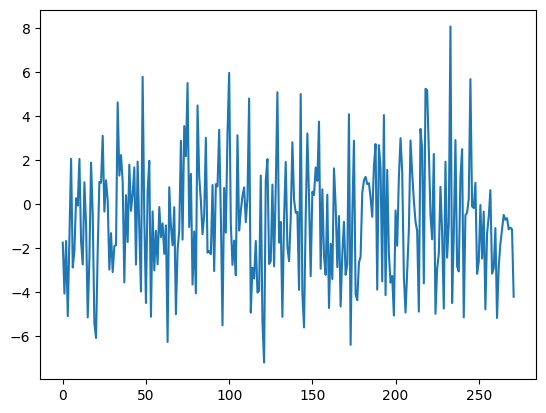

In [373]:
plt.plot(bootstrapped_residuals)

In [ ]:
for 